<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_4_S6_tracks.ipynb"><< Sentinel-6 tracks</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_6_S6_SSHA.ipynb">Sentinel-6 sea surface height anomalies >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Vinca Rosmorduc (CLS)

<html>
<div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-s6"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=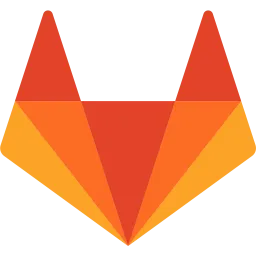" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?sort=startDate%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CSoftware%20%26%20code%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D,%22org-satellite-sensor%22:%5B%22EUMETSAT%7CSentinel-6%22,%22EUMETSAT%7CSentinel-6%7CAMR-C%22,%22EUMETSAT%7CSentinel-6%7CDORIS%22,%22EUMETSAT%7CSentinel-6%7CGNSS-RO%22,%22EUMETSAT%7CSentinel-6%7CLRA%22,%22EUMETSAT%7CSentinel-6%7CPoseidon-4%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=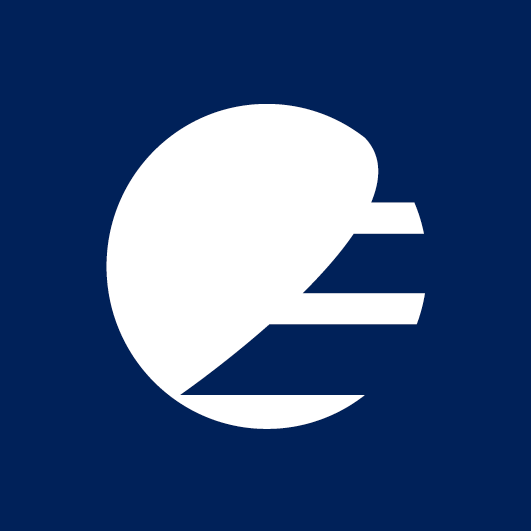" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-s6/HEAD?urlpath=%2Ftree%2F1_S6_introductory%2F1_5_S6_waveforms.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Launch on Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-s6/1_S6_introductory/1_5_S6_waveforms.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Launch on WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div> 
</html>

<div class="alert alert-block alert-success">
<h3>Learn Sentinel-6: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook:
- **<a href="1_1a_S6_data_access_SFTP.ipynb" target="_blank">1_1a_S6_data_access_SFTP</a>**; this will download the required Sentinel-6 products for this notebook.

</div>
<hr>

# 1.5 Sentinel-6 waveforms 


### Data used

| Product Description  | EUMETSAT collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-6 Poseidon-4 Altimetry level 1b High Resolution | EO:EUM:DAT:0851 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0851" target="_blank">Description</a> | EO:EUM:DAT:0851 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3A0851" target="_blank">Description</a> |


### Learning outcomes

At the end of this notebook you will know;
* What an altimetry waveform is.
* What characteristics of the waveform can be used to derive different geophysical properties.
* How altimetry waveforms look in different measurement modes.
* What waveforms look like over different surfaces.

### Outline

Radar altimeters emit pulses and then wait to receive the echo of those signals after they have bounced off the Earth surface. The return echo average - also known as a 'waveform' contains information not just about the relative distance between the altimeter and the surface, but also about some of the characteristics of the surface.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
 
 1. [What are waveforms?](#section1)
 1. [Waveforms and modes](#section2)
 1. [Waveform changes by surface class](#section3)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports
import cartopy
import cmocean
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os
import warnings
import glob

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 12})

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. What are waveforms?
[Back to top](#TOC_TOP)

</div>

Figure 1 shows how the waveform is generated in the altimetry measurement process (classical processing), and how this can vary between measurements made over calm and rougher waters. 

<img src='../img/waveforms_generated.png' align='centre' width='75%'></img><center>Figure 1: Classical altimetry measurement process and  waveform generation over calm (left panel) and rough (right panel) seas (courtesy: CNES, http://www.altimetry.info/)</center>


Figure 2 shows a SAR-mode waveform shape and the major characteristics of the waveform that are used to derive useful geophysical information about the ocean surface.

<img src='../img/waveform.PNG' align='centre' width='75%'></img>
<center>Figure 2: Diagram of a typical SAR-mode altimetry waveform over the ocean.</center>

* epoch: at mid-height, this gives the time delay of the expected return of the radar pulse from the altimeter. This is estimated by an algorithm called a 'retracker'. This gives the time the radar pulse took to travel from the satellite to the surface (using the speed of light as velocity for the pulse, this gives the 'range') and back again. From this we can calculate the sea surface height.
* P: the amplitude of the reflected signal. This amplitude with respect to the emission amplitude gives the backscatter coefficient, sigma0. This can be useful for characterising the surface roughness (and thus winds over ocean).
* leading edge slope: this can be related to the significant wave height (SWH), as shown in figure 1: the return signal will be more spread out when bouncing first on (high) wave crest to finish on (deep) wave troughs than if the surface is flat. 

For further information about altimetry measurement theory, visit the associated pages in the **<a href="https://eumetsatspace.atlassian.net/wiki/spaces/ALT/pages/1537343494/Altimetry+measurement+principles">EUMETSAT user support knowledge base</a>**.


<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Waveforms and modes
[Back to top](#TOC_TOP)

</div>

Sentinel-6 altimetry data comes in two modes, High Resolution and Low Resolution. In the rest of this notebook we'll look how these modes have an effect on the waveforms at level-1B. As before, we'll start by opening the data files (remembering that Sentinel-6 stores data in different groups)

In [2]:
# selecting SAFE directories
SAFE_products = [glob.glob(os.path.join(os.getcwd(), 'products','S6A_P4_1B_LR*_NT_*','*.nc'))[0],
                 glob.glob(os.path.join(os.getcwd(), 'products','S6A_P4_1B_HR*_NT_*','*.nc'))[0]]

In [3]:
# read data
ds_20_ku = []
ds = []
for SAFE_product in SAFE_products:
    ds_20_ku.append(xr.open_dataset(SAFE_product, group='data_20/ku'))
    ds.append(xr.open_dataset(SAFE_product))

Now that we've opened the data, we can plot the waveforms. In the cell below, we'll plot two waveforms from the same point in the track, one obtained from the LR processing, and the other from the HR one (both at 20 Hz).

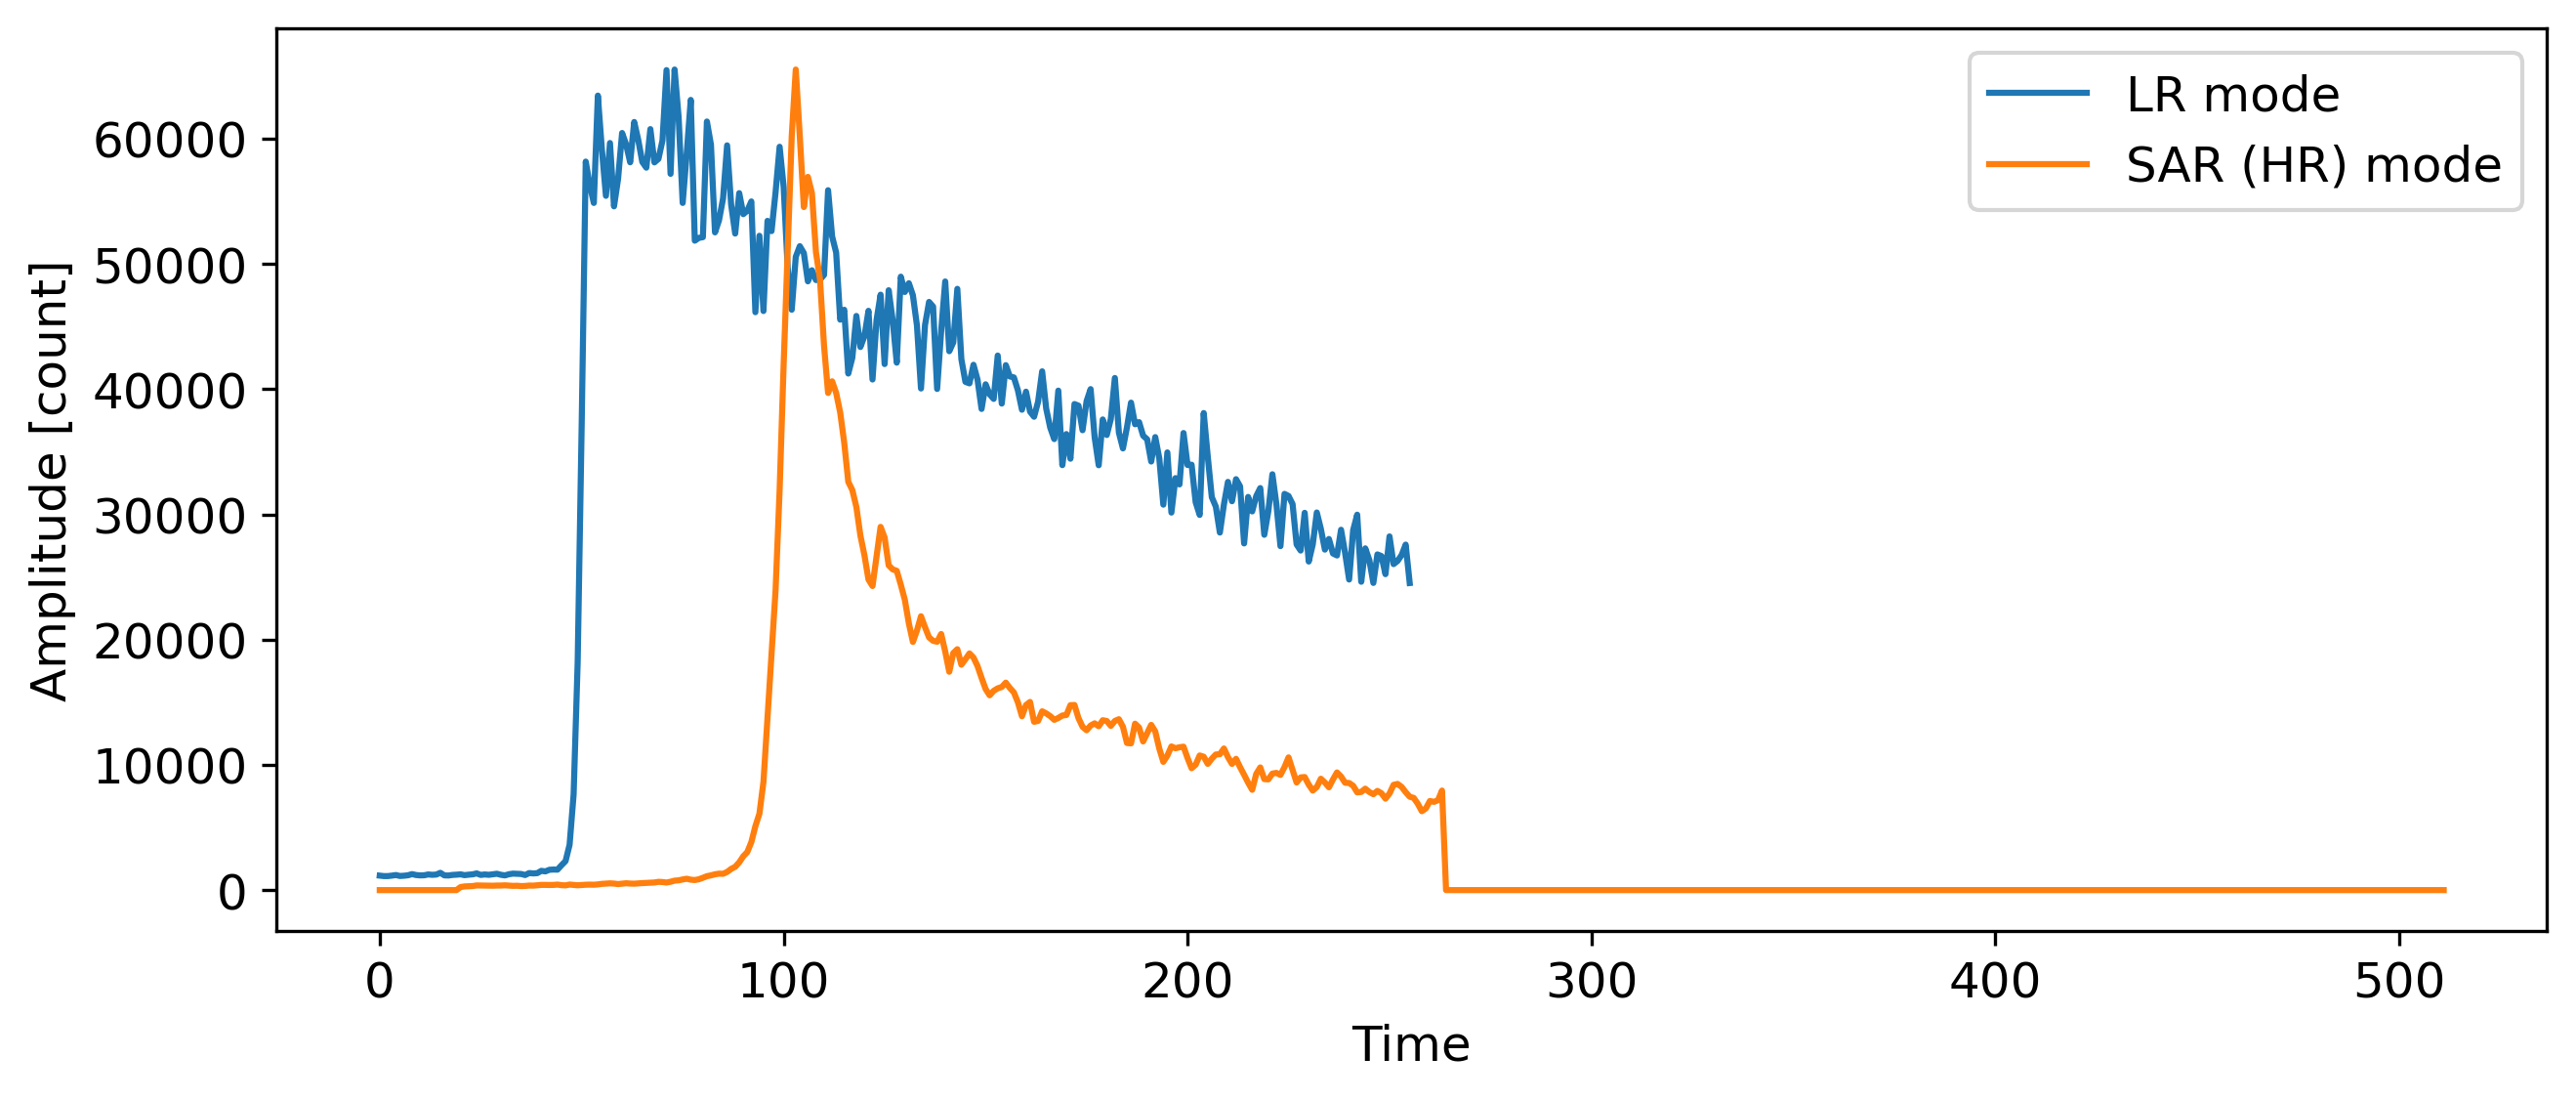

In [4]:
fig = plt.figure(figsize=(10, 4), dpi=300)
ax = plt.subplot(1,1,1)
p1, = ax.plot(ds[0].coords["samples"], ds_20_ku[0]["power_waveform"][3000,:], label='LR mode')
p1, = ax.plot(ds[1].coords["samples_ov"], ds_20_ku[1]["power_waveform"][3000,:], label='SAR (HR) mode')
plt.xlabel('Time')
plt.ylabel('Amplitude [count]')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels)
plt.show()

In the plot we can see that the two waveforms are quite different in shape. In general, HR (SAR) mode results in waveforms with a much sharper peak over open ocean than classical LR mode. The amplitudes are homogeneized so you need a computation to retrieve the true power of the backscattered signal (in Watts).
This is a result of the fact that the surface of the wave on the whole disk or annular footprint is theoretically equal (hence a slow decrease in classical (LR) mode), while the bits of 'slices' processed by the SAR mode decrease in area much faster. A much more accurate along-track spatial resolution can be achieved in this mode by averaging a number of looks of the same slice observed at different positions of the satellite. This is particularly useful for complex domains such as near the coasts, the edges of ice etc. 



Note that the HR waveforms are oversampled, ending up with 512 samples, while "only" 256 samples are used for Low Resolution (this for a question of easier fitting of the leading edge (the rising slope of the curve) to the model when it is very steep). Using more samples provides with the "tail" of the curve, which gives information on the antenna pointing strictly to nadir, or mispointing slightly (which in turn impacts some estimates computed from the waveform shape). One last difference between HR data themselves: close to the coasts, the tail of the waveform can be provided (HR "raw"), while it is cut in the open ocean (HR "RMC" or range migration correction) to reduce on-board storage and downlink. However, when comparing HR and LR waveforms, you won't see the leading edge for a same point at the same sample position because of this. 


<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Waveform changes by surface class
[Back to top](#TOC_TOP)

</div>

The processing mode is not the only thing than influences the waveform shape substantially. Those data are natively scaled on 0-65534, so the amplitude scales are not that relevant; differences in the average come from the fact the peaks are not at the same sample over non-water surfaces, mostly. 
Different types of surface produce markedly different waveforms. Using the surface classification information provided in the Sentinel-6 level-1B altimetry products, the cell below plots a selection of waveforms associated with different surface classes. Note that again we are using waveforms from the LR mode processing chain here.

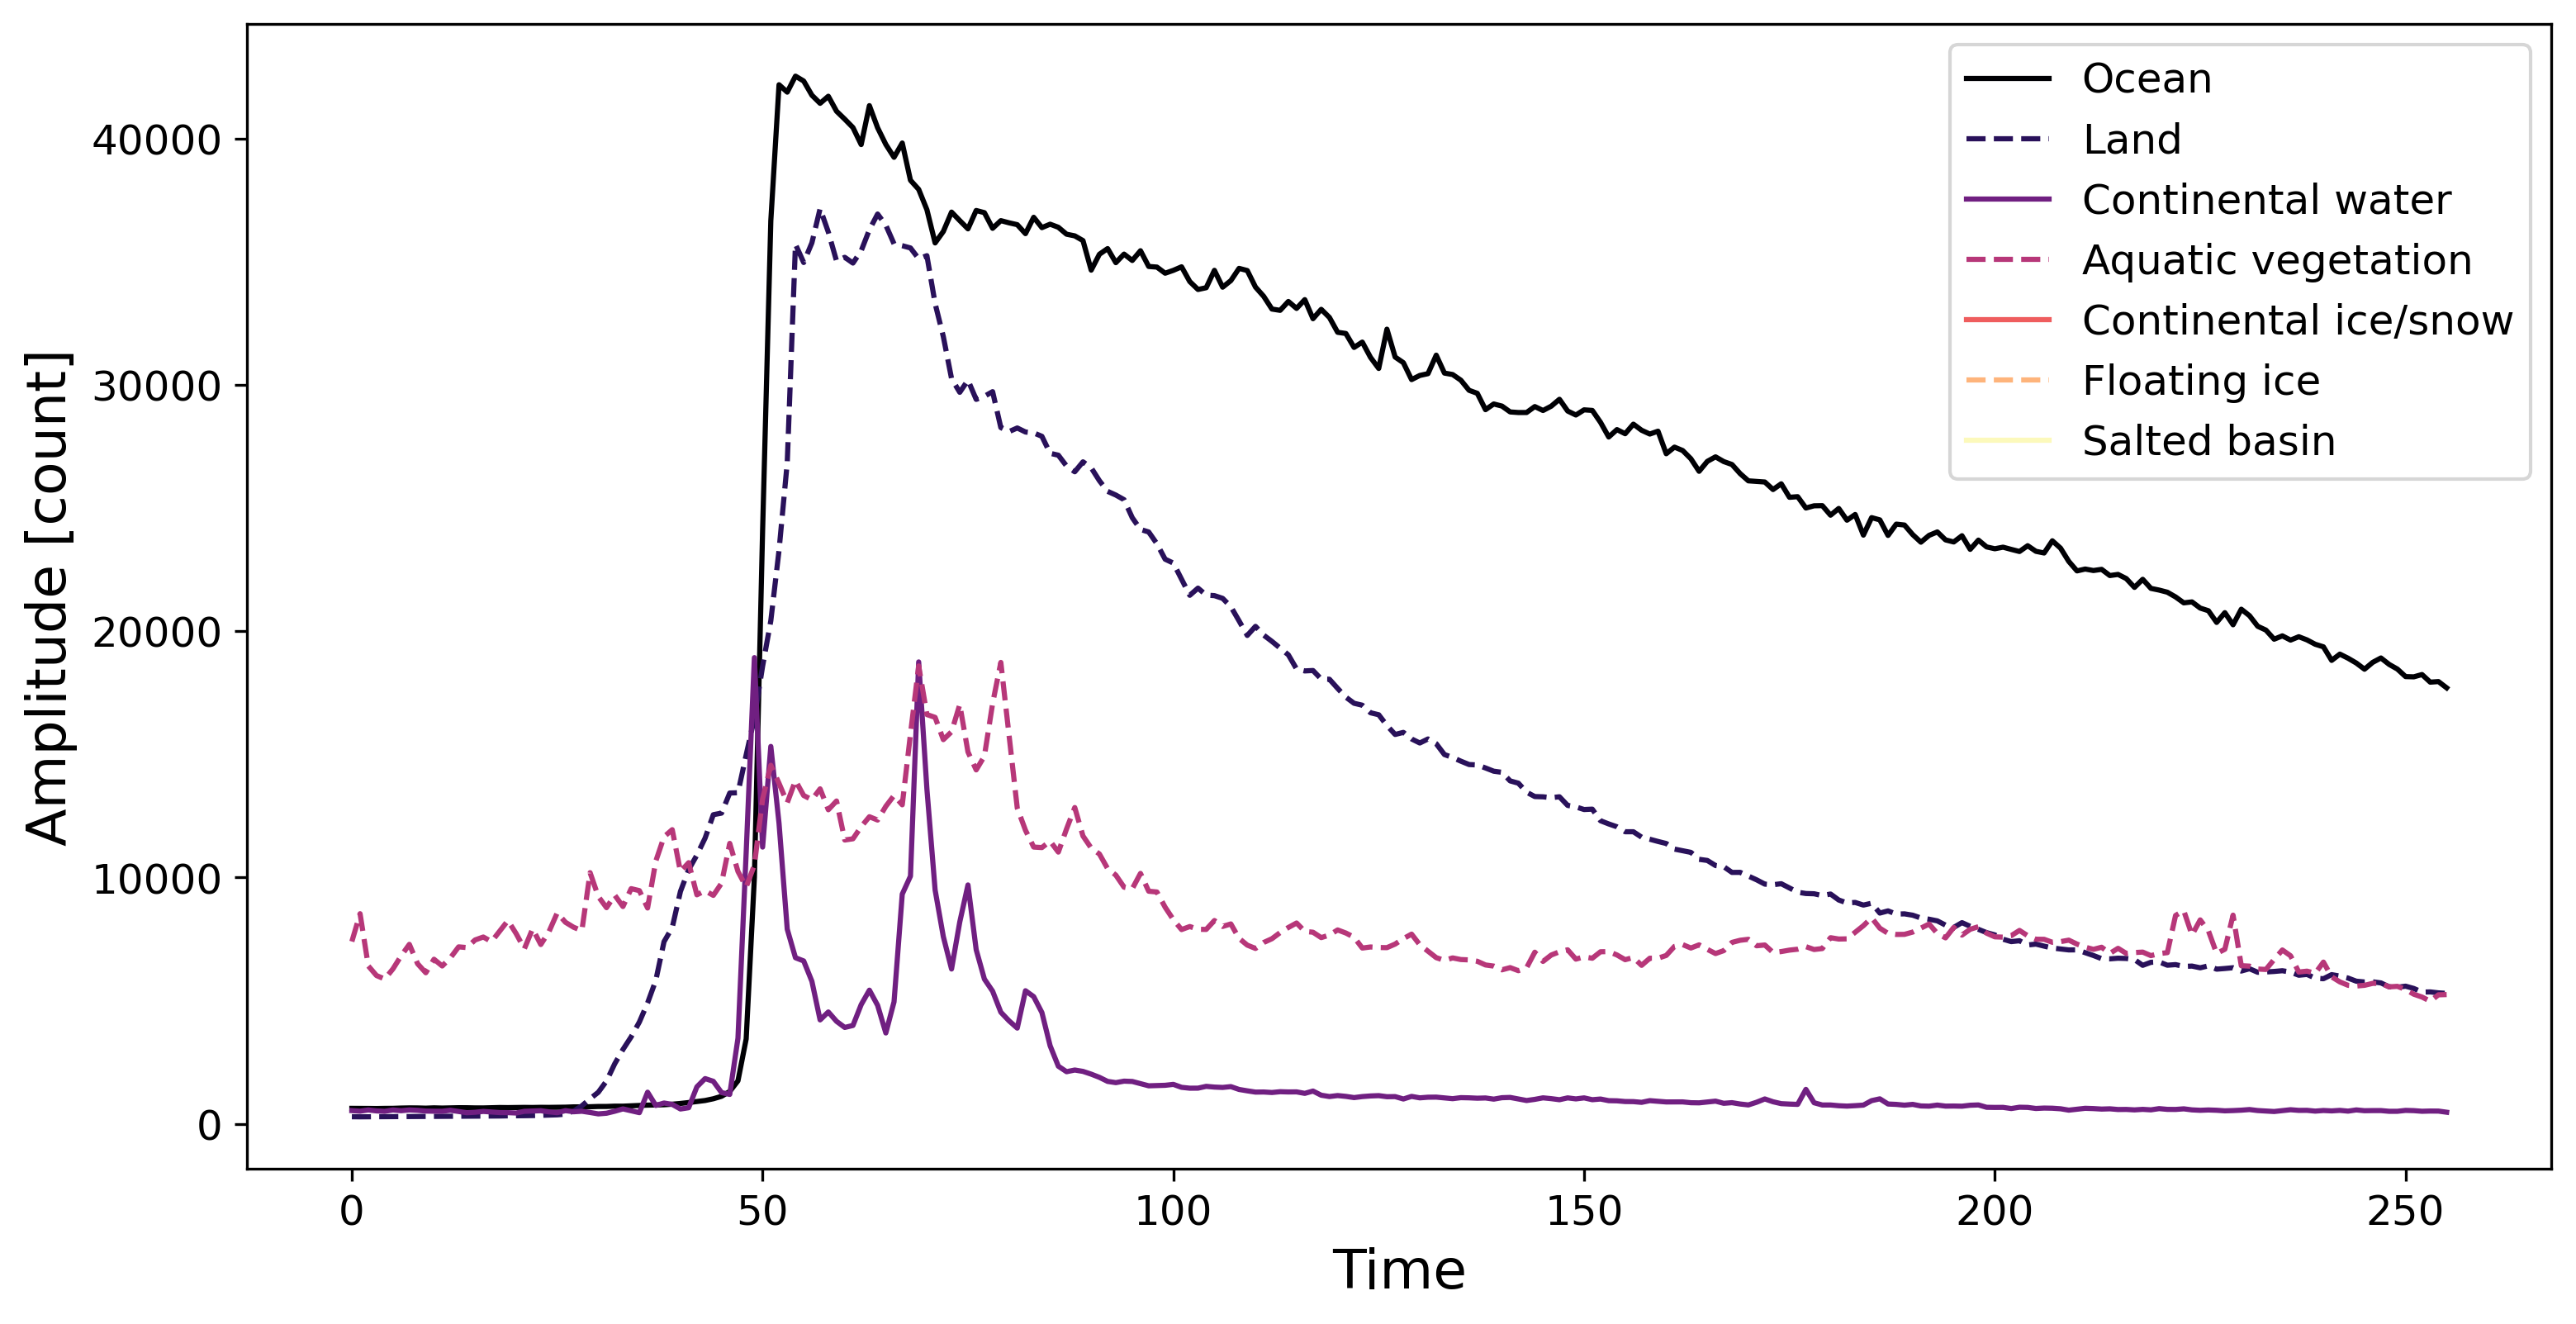

In [5]:
fig = plt.figure(figsize=(12, 6), dpi=300)

surf = np.array(ds_20_ku[0]["surface_classification_flag"])
wf = np.array(ds_20_ku[0]["power_waveform"])
cmap = plt.cm.magma
Xvals = ds[0].coords["samples"]

p1, = plt.plot(Xvals, np.nanmean(wf[np.where(surf == 0)[0][0:100], :], axis=0), c=cmap(0))
p2, = plt.plot(Xvals, np.nanmean(wf[np.where(surf == 1)[0][0:100], :], axis=0), c=cmap(0.16), linestyle='--')
p3, = plt.plot(Xvals, np.nanmean(wf[np.where(surf == 2)[0][0:100], :], axis=0), c=cmap(0.33))
p4, = plt.plot(Xvals, np.nanmean(wf[np.where(surf == 3)[0][0:100], :], axis=0), c=cmap(0.5), linestyle='--')
p5, = plt.plot(Xvals, np.nanmean(wf[np.where(surf == 4)[0][0:100], :], axis=0), c=cmap(0.66))
p6, = plt.plot(Xvals, np.nanmean(wf[np.where(surf == 5)[0][0:100], :], axis=0), c=cmap(0.84), linestyle='--')
p7, = plt.plot(Xvals, np.nanmean(wf[np.where(surf == 6)[0][0:100], :], axis=0), c=cmap(0.99))

plt.xlabel('Time', fontsize=16)
plt.ylabel('Amplitude [count]',  fontsize=16)
plt.legend([p1, p2, p3, p4, p5, p6, p7],
           ['Ocean', 'Land', 'Continental water',
            'Aquatic vegetation', 'Continental ice/snow',
            'Floating ice', 'Salted basin'])
plt.show()

We can also look at the variability in the waveforms along the track. The cell below takes a waveform every so often along the whole track and plot it.

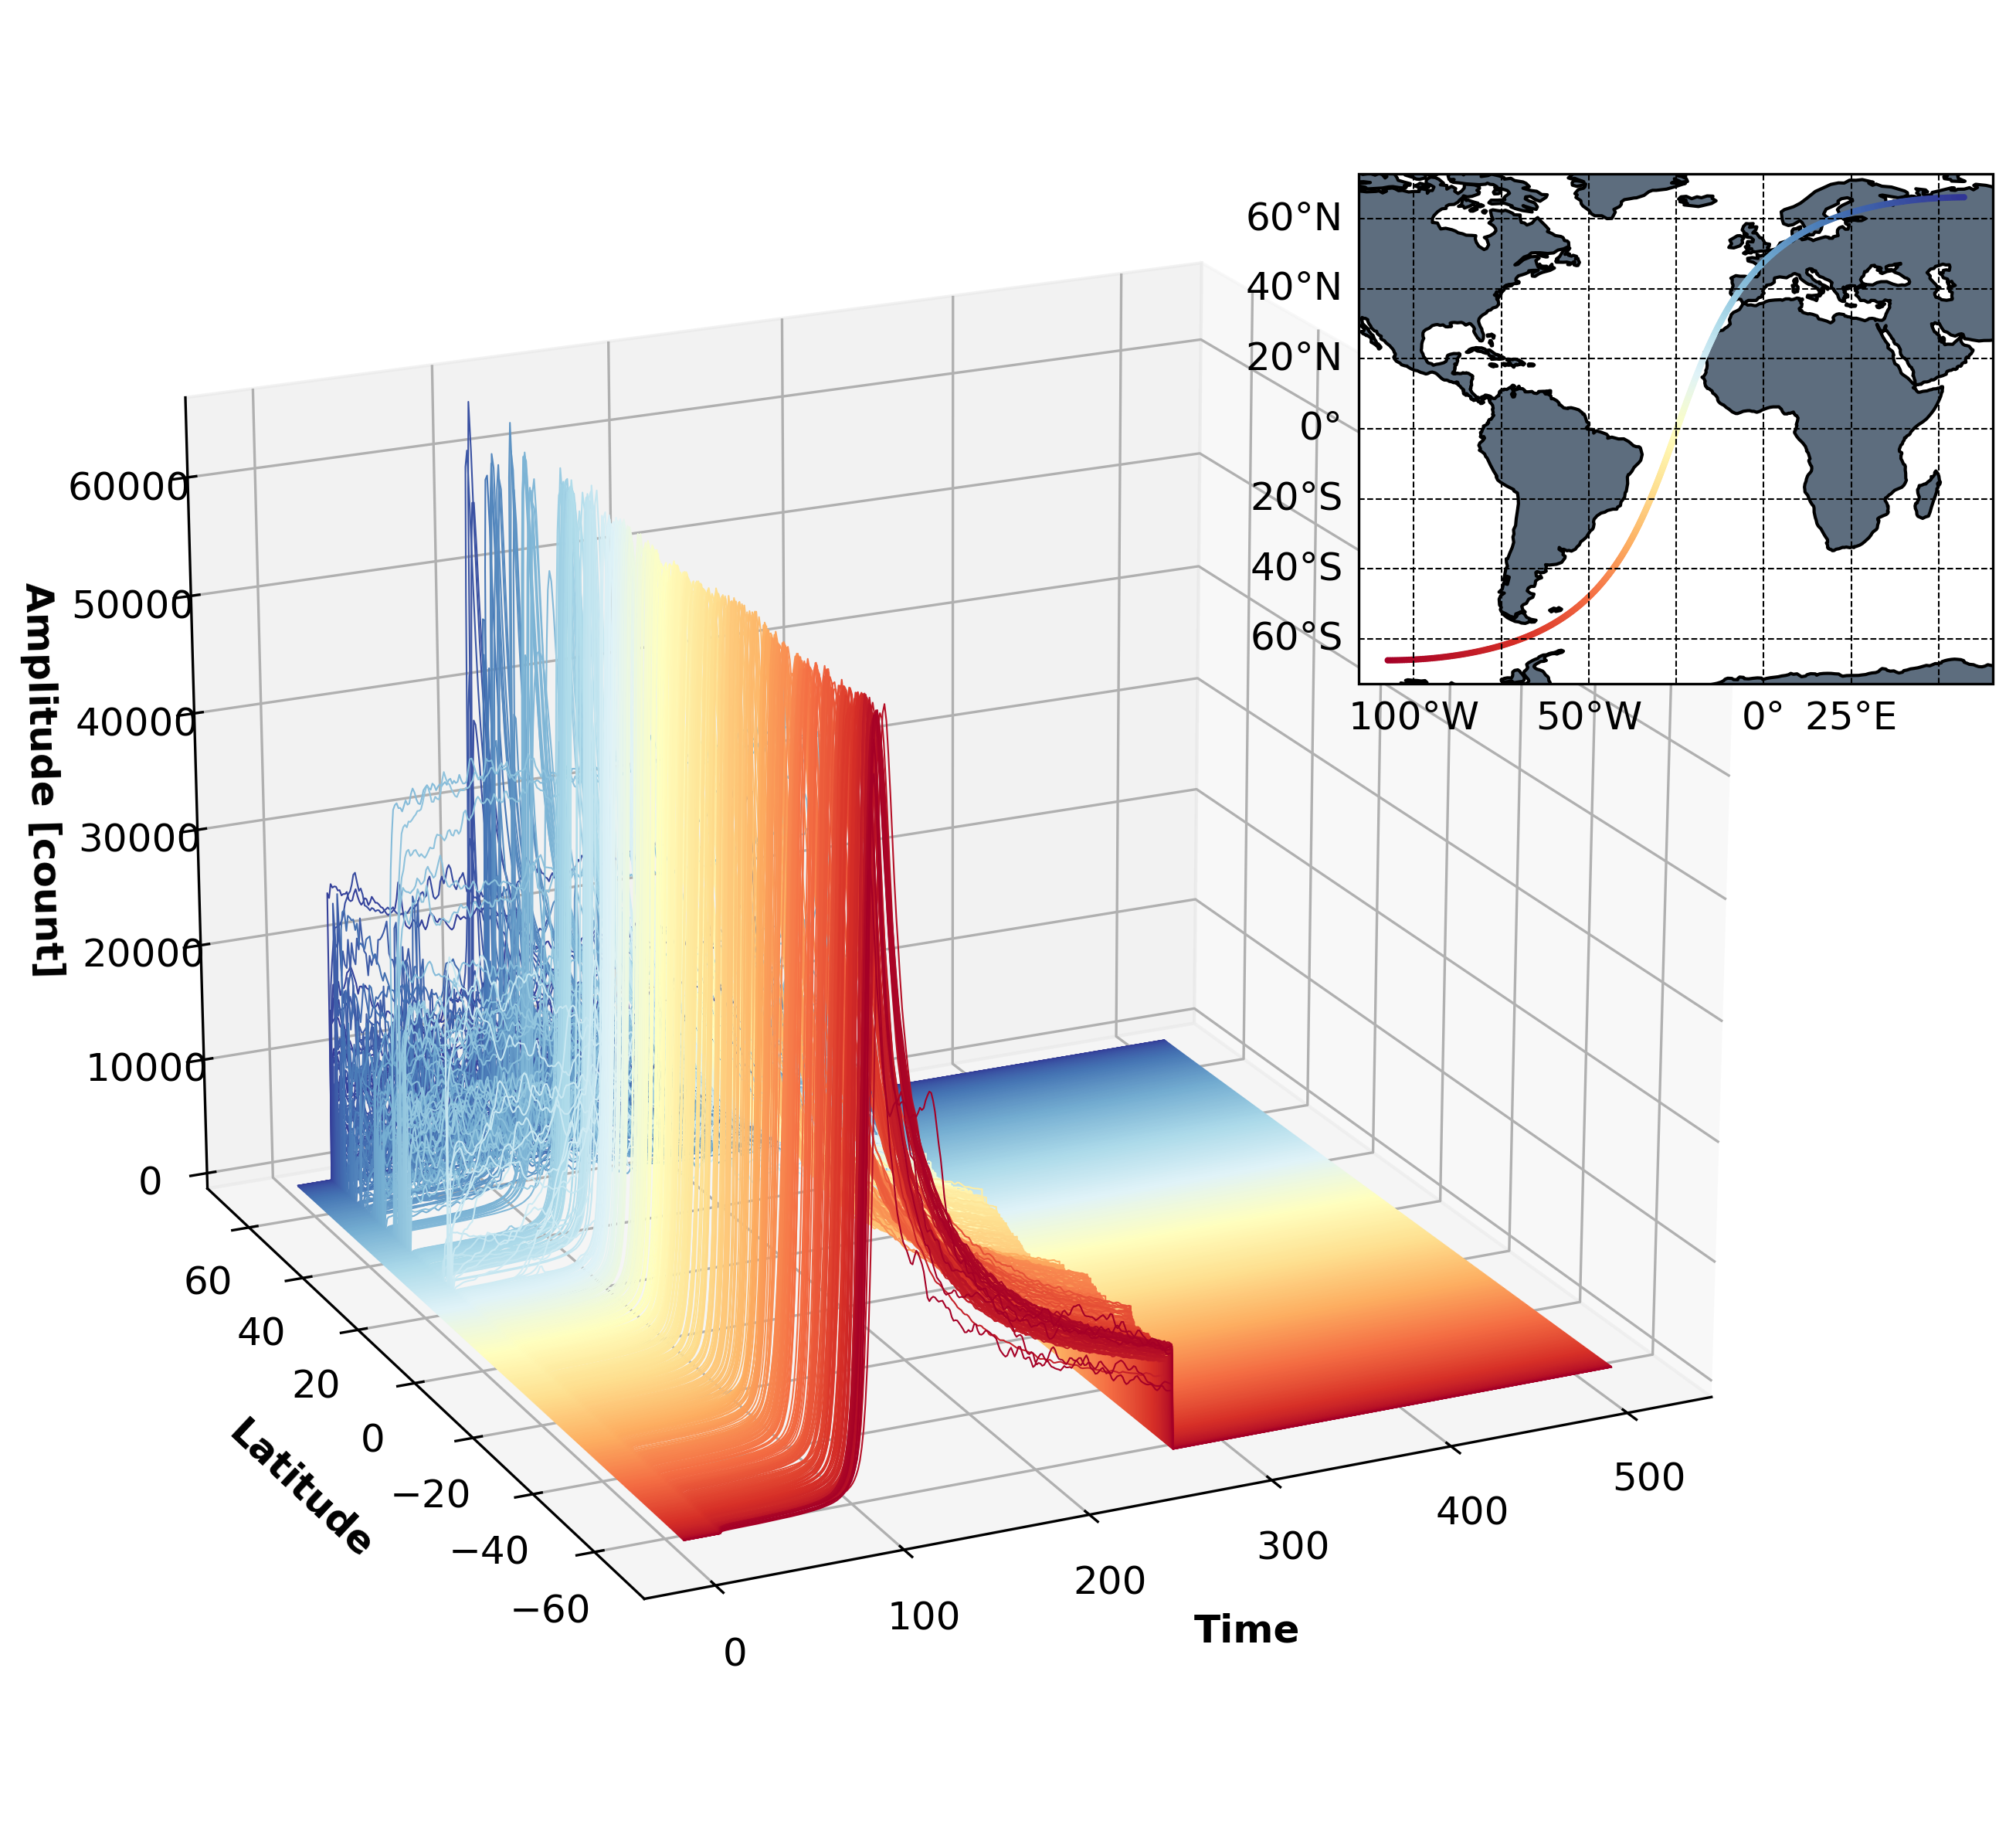

In [6]:
fig = plt.figure(figsize=(12, 10), dpi=300)
ax1 = fig.add_subplot(1, 1, 1, projection='3d')

stride = 100
high_res = 1
if high_res == 0:
    samples = ds[high_res].coords["samples"]
else:
    samples = ds[high_res].coords["samples_ov"]
    
counter = int(np.shape(ds_20_ku[high_res]["power_waveform"])[0]/stride)
waveform_array = np.zeros((counter, len(samples)))
lon_array = []
lat_array = []
cmap = plt.cm.RdYlBu

all_lons = ds_20_ku[high_res]["longitude"]
all_lons[all_lons > 180] = all_lons[all_lons > 180] - 360
all_lats = ds_20_ku[high_res]["latitude"]

for ii in range(counter):
    waveform_array[ii, :] = np.nanmean(ds_20_ku[high_res]["power_waveform"][ii*stride:(ii+1)*stride, :], axis=0)
    lons = np.nanmean(all_lons[ii*stride:(ii+1)*stride])
    lats = np.nanmean(all_lats[ii*stride:(ii+1)*stride])
    lon_array.append(lons)
    lat_array.append(lats)
    p1, = ax1.plot3D(samples, np.ones(len(samples))*lats,
                    waveform_array[ii, :], color=cmap(ii/counter), linewidth=0.5, zorder=counter-ii)

ax1.view_init(elev=20, azim=245)
ax1.set_xlabel('Time', fontweight='bold', labelpad=10)
ax1.set_ylabel('Latitude', fontweight='bold', labelpad=10)
ax1.set_zlabel('Amplitude [count]', fontweight='bold', labelpad=10)

ax2 = fig.add_subplot(2, 3, 3, projection=cartopy.crs.PlateCarree())
ax2.scatter(lon_array, lat_array, 1, range(len(lon_array)), cmap=cmap)
ax2.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
g1 = ax2.gridlines(draw_labels = True, zorder=20, color='0.0', linestyle='--', linewidth=0.5)
g1.top_labels = False
g1.right_labels = False
g1.xlabel_style = {'color': 'black'}
g1.ylabel_style = {'color': 'black'}
ax2.set(facecolor = "1.0")
#ax2.set_extent([-30, 30, -20, 85])
plt.savefig('1_5_S6_waveforms.png')

Over the track we can see how the waveform change shape notably in areas where the track is likely to be crossing areas with ice, and areas of land.

In the next notebook we'll look more closely at how we can use range to derive the key parameter for altimetry missions - sea surface height.

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_4_S6_tracks.ipynb"><< Sentinel-6 tracks</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_6_S6_SSHA.ipynb">Sentinel-6 sea surface height anomalies >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>